In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

import os

# Отримати поточний шлях робочої папки
current_working_directory = os.getcwd()

print("Поточний шлях робочої папки:", current_working_directory)


Поточний шлях робочої папки: /content


# 1 Збір даних


In [17]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import os

# Шлях до папки з даними на Google Drive
data_folder_path = '/content/drive/MyDrive/data/'

activities = ['idle', 'running', 'stairs', 'walking']
data_collections = []

for index, activity in enumerate(activities, start=1):
    activity_path = Path(data_folder_path) / activity
    csv_files = list(activity_path.glob('*.csv'))

    if not csv_files:
        print(f"No CSV files found for activity: {activity}")
        continue

    # Додайте цей код для виведення списку файлів у кожній директорії
    print(f"Files for activity {activity}:")
    for file in csv_files:
        print(f"- {file}")

    df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
    df['activity'] = activity
    data_collections.append(df)

data = pd.concat(data_collections, ignore_index=True)
data


Показано результат, скорочений до останніх рядків (5000).
- /content/drive/MyDrive/data/running/running-499.csv
- /content/drive/MyDrive/data/running/running-507.csv
- /content/drive/MyDrive/data/running/running-494.csv
- /content/drive/MyDrive/data/running/running-492.csv
- /content/drive/MyDrive/data/running/running-500.csv
- /content/drive/MyDrive/data/running/running-506.csv
- /content/drive/MyDrive/data/running/running-497.csv
- /content/drive/MyDrive/data/running/running-50.csv
- /content/drive/MyDrive/data/running/running-49.csv
- /content/drive/MyDrive/data/running/running-477.csv
- /content/drive/MyDrive/data/running/running-505.csv
- /content/drive/MyDrive/data/running/running-496.csv
- /content/drive/MyDrive/data/running/running-489.csv
- /content/drive/MyDrive/data/running/running-511.csv
- /content/drive/MyDrive/data/running/running-515.csv
- /content/drive/MyDrive/data/running/running-529.csv
- /content/drive/MyDrive/data/running/running-541.csv
- /content/drive/MyDrive/d

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,0.435745,-0.033519,9.749189,idle
1,0.411803,0.028730,9.739613,idle
2,0.421380,-0.090980,9.730036,idle
3,0.392649,-0.019154,9.753978,idle
4,0.392649,-0.033519,9.763555,idle
...,...,...,...,...
194455,-6.057330,-16.529568,2.743755,walking
194456,-4.462792,11.176133,14.006080,walking
194457,1.393425,-13.579912,-4.328717,walking
194458,-1.441309,-8.815451,-2.834735,walking


# 2 Тренування на вихідних нормалізованих даних

In [23]:
features = ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']

## Нормалізація даних



In [24]:
scaler = StandardScaler()

data_to_normalize = data[features]

# Нормалізація даних
normalized_data = scaler.fit_transform(data_to_normalize)

# Заміна вихідних даних нормалізованими даними
ndata = data.copy()
ndata[features] = normalized_data
ndata

,accelerometer_X,accelerometer_Y,accelerometer_Z,activity
0,-0.177989,-0.132551,1.105863,idle
1,-0.180837,-0.127563,1.104530,idle
2,-0.179698,-0.137154,1.103198,idle
3,-0.183115,-0.131400,1.106529,idle
4,-0.183115,-0.132551,1.107861,idle
...,...,...,...,...
194455,-0.950292,-1.454166,0.131287,walking
194456,-0.760634,0.765535,1.698069,walking
194457,-0.064080,-1.217849,-0.852616,walking
194458,-0.401251,-0.836134,-0.644777,walking


## Розділяємо дані на навчальні та тестові

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data["activity"],
    test_size=0.3,
    stratify=ndata["activity"],
)

## Навчаємо за допомогою алгоритму опорних векторів

In [26]:
%%time

model_svm = SVC()
model_svm.fit(X_train, y_train)

CPU times: user 3min 32s, sys: 763 ms, total: 3min 33s
Wall time: 3min 47s


SVC()

## Навчаємо за допомогою алгоритму випадкового лісу

In [27]:
%%time

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

CPU times: user 9.62 s, sys: 13.5 ms, total: 9.64 s
Wall time: 9.63 s


RandomForestClassifier()

## Порівнюємо точність результатів


In [28]:
score_svm = model_svm.score(X_test, y_test)
score_rf = model_rf.score(X_test, y_test)

print(f"Точність моделі SVM: {score_svm:.3f}")
print(f"Точність моделі випадкового лісу: {score_rf:.3f}")

Точність моделі SVM: 0.894
Точність моделі випадкового лісу: 1.000


## Прогнозування

In [30]:
y_predicted_svm = model_svm.predict(X_test)
y_predicted_rf = model_rf.predict(X_test)

## Будуємо матрицю помилок (`confusion matrix`).

In [31]:
conf_matrix_svm = confusion_matrix(y_test, y_predicted_svm)
conf_matrix_rf = confusion_matrix(y_test, y_predicted_rf)

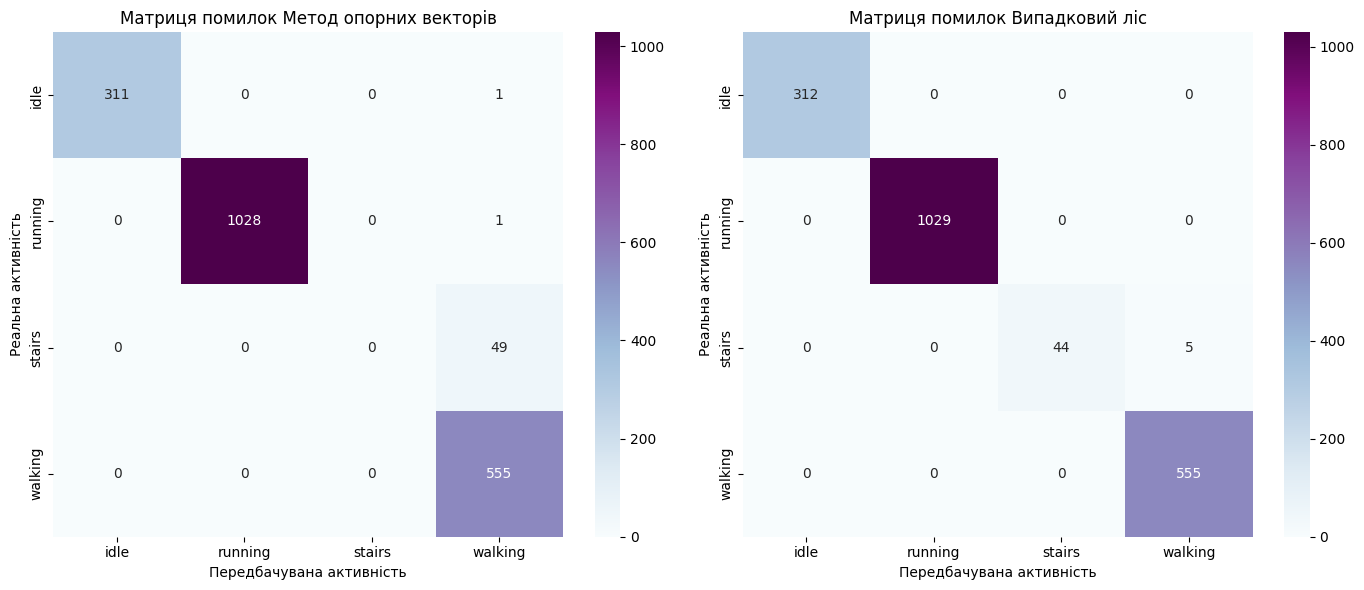

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

classifiers = ["Метод опорних векторів", "Випадковий ліс"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]

for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='BuPu',
        xticklabels=activities,
        yticklabels=activities,
        ax=axes[i],
    )
    axes[i].set_title(f"Матриця помилок {classifier}")
    axes[i].set_xlabel("Передбачувана активність")
    axes[i].set_ylabel("Реальна активність")

plt.tight_layout()

plt.show()

# 3 Тренування на підготовленних даних

## Створення необхідних функцій

In [41]:
def iqr(data):

    sorted_data = np.sort(data)

    Q1 = np.percentile(sorted_data, 25)

    Q3 = np.percentile(sorted_data, 75)

    IQR = Q3 - Q1

    return IQR

def argmin(data):

    return np.argmin(data)

def entropy(column_data):

    hist, bins = np.histogram(column_data, bins='auto')

    probs = hist / len(column_data)

    probs = probs[probs > 0]

    entropy = -np.sum(probs * np.log2(probs))

    return entropy

def mad(data):

    mean = np.mean(data)

    absolute_deviations = np.abs(data - mean)

    mad = np.mean(absolute_deviations)

    return mad

def rmse(data):

    mean = np.mean(data)

    squared_errors = [(x - mean) ** 2 for x in data]

    rmse = np.sqrt(np.mean(squared_errors))

    return rmse

## Створення датасету на основі додаткових ознак

In [44]:
axis_aggregations = {
    'accelerometer_X': ["max", "min", entropy, iqr],
    'accelerometer_Y': ["max", argmin, mad, "median", "skew", "std", rmse],
    'accelerometer_Z': ["skew"]
}

data_tdf = pd.DataFrame()


for axis, functions in axis_aggregations.items():
    axis_data = ndata.groupby(["activity", ndata.index // 30])[axis].agg(functions)

    multiindex = pd.MultiIndex.from_product([[axis], axis_data.columns])

    axis_data.columns = multiindex
    data_tdf = pd.concat([data_tdf, axis_data], axis=1)

data_tdf.reset_index(level=0, inplace=True)

In [45]:
data_tdf

activity accelerometer_X                               accelerometer_Y  \
                          max       min   entropy       iqr             max   
0        idle       -0.163181 -0.197923  2.650538  0.004984       -0.122960   
1        idle       -0.163181 -0.197923  2.435592  0.004272       -0.122960   
2        idle       -0.175141 -0.186532  2.266879  0.003133       -0.127947   
3        idle       -0.174002 -0.188811  2.441085  0.002705       -0.124111   
4        idle       -0.237222 -0.245765  2.574418  0.001566       -0.109533   
...       ...             ...       ...       ...       ...             ...   
6477  walking        1.777258 -0.965670  2.404936  0.553598       -0.099942   
6478  walking        0.163738 -1.862133  2.397417  0.758776        0.676915   
6479  walking        0.836940 -1.990850  2.417459  0.707659        0.841494   
6480  walking        0.331753 -1.091539  2.544532  0.352975       -0.150965   
6481  walking        1.520394 -0.989591  2.248604  0.756498        0.765535   

                                                              accelerometer_Z  
     argmin       mad    median      skew       std      rmse            skew  
0        14  0.002765 -0.131975 -0.810193  0.004242  0.004171        0.623136  
1         6  0.002481 -0.131783 -1.085431  0.004044  0.003976        0.410793  
2         8  0.001736 -0.131400 -0.368293  0.002192  0.002155       -0.074001  
3        10  0.001541 -0.131783  0.684116  0.002336  0.002297        0.487921  
4         4  0.000987 -0.111834 -1.238324  0.001364  0.001341        0.023089  
...     ...       ...       ...       ...       ...       ...             ...  
6477     12  0.378975 -1.126544  0.307728  0.465426  0.457603       -1.498401  
6478      6  0.413086 -0.831146  0.304773  0.581024  0.571259        0.653174  
6479      4  0.505717 -0.810814  0.652425  0.654918  0.643910        1.446102  
6480     24  0.362138 -0.900200 -0.247608  0.455011  0.447364       -0.366712  
6481      7  0.504846 -0.689586 -0.156714  0.684708  0.673199        0.781241  

[6482 rows x 13 columns]

## Розділяємо датасет на навчальний і тестовий набори

In [46]:

X_train, X_test, y_train, y_test = train_test_split(
    data_tdf[features], data_tdf["activity"],
    test_size=0.3,
    stratify=data_tdf["activity"],
)

## Навчаємо за домомогою алгоритму опорних векторів

In [47]:
%%time

model_svm = SVC()
model_svm.fit(X_train, y_train)

CPU times: user 127 ms, sys: 1.99 ms, total: 129 ms
Wall time: 129 ms


SVC()

## Навчаємо за домомогою алгоритму випадкового лісу

In [48]:
%%time

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train, y_train)

CPU times: user 461 ms, sys: 4 ms, total: 465 ms
Wall time: 466 ms


RandomForestClassifier()

## Визначаємо точність моделей на тестовому наборі

In [50]:
score_svm = model_svm.score(X_test, y_test)
score_rf = model_rf.score(X_test, y_test)

print(f"Точність моделі опорних векторів: {score_svm:.3f}")
print(f"Точність моделі випадкового лісу: {score_rf:.3f}")

Точність моделі опорних векторів: 0.974
Точність моделі випадкового лісу: 0.997


## Пргнозування

In [51]:
y_predicted_svm = model_svm.predict(X_test)
y_predicted_rf = model_rf.predict(X_test)

Побудуємо матрицю помилок `confusion matrix`

In [52]:
conf_matrix_svm = confusion_matrix(y_test, y_predicted_svm)
conf_matrix_rf = confusion_matrix(y_test, y_predicted_rf)

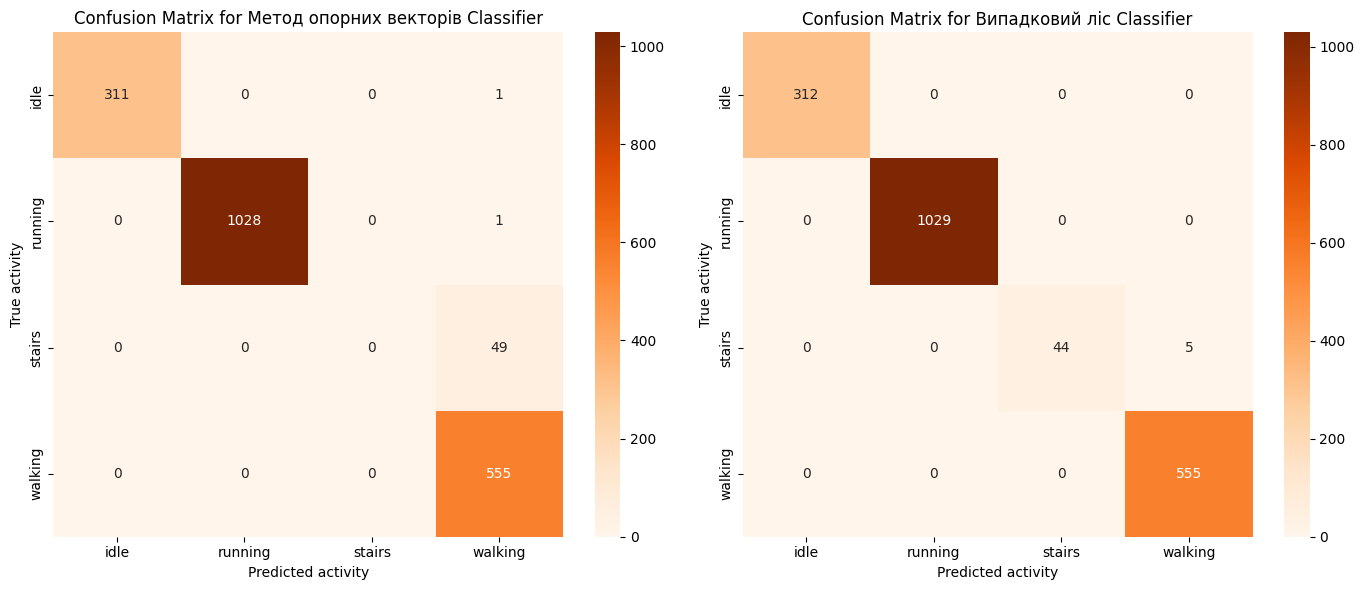

In [72]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

classifiers = ["Метод опорних векторів", "Випадковий ліс"]
confusion_matrices = [conf_matrix_svm, conf_matrix_rf]
for i, classifier in enumerate(classifiers):
    sns.heatmap(
        confusion_matrices[i],
        annot=True,
        fmt='d',
        cmap='Oranges',
        xticklabels=activities,
        yticklabels=activities,
        ax=axes[i],
    )
    axes[i].set_title(f"Confusion Matrix for {classifier} Classifier")
    axes[i].set_xlabel("Predicted activity")
    axes[i].set_ylabel("True activity")

plt.tight_layout()

plt.show()